In [63]:
pwd

'C:\\Users\\ryanc\\Desktop\\NU (4th) Senior classes\\Stat 390 - Data Science Project\\Code Work'

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv("owid-covid-data.csv")

In [66]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [67]:
#### Using missingness code pulled from Rakin's EDA

missing = pd.DataFrame(df.isnull().sum())
missing['% missing'] = df.isnull().sum()/df.shape[0]
missing.columns = ["Missing Count", "Proportion Missing"]
missing = missing.sort_values(by="Proportion Missing", ascending=True)

In [68]:
missing[missing["Proportion Missing"] < .20]

,Missing Count,Proportion Missing
iso_code,0,0.000000
location,0,0.000000
date,0,0.000000
population,1075,0.006463
total_cases,3033,0.018235
new_cases,3193,0.019197
total_cases_per_million,3791,0.022793
new_cases_per_million,3951,0.023755
new_cases_smoothed,5176,0.031120
new_cases_smoothed_per_million,5928,0.035641


# Using the variables satisfying a missingness proportion less than 20%

## Linegraphs displaying the trends of total_cases, new_cases, total_deaths over time

### Total_cases over time

In [73]:
# Getting a list of all unique locations - there are 238, but 195 unique countries
df_countries = df['location'].tolist()
unique_countries = set(df_countries)
unique_countries = list(unique_countries)

238

In [74]:
# Getting unique country names
unique_countries = df['location'].unique()

# Creating DataFrames for each unique country
country_dataframes = {}  # A dictionary to store DataFrames for each country

for country in unique_countries:
    country_df = df[df['location'] == country]
    country_dataframes[country] = country_df

# Now, 'country_dataframes' is a dictionary where keys are country names, and values are DataFrames containing data for each country.

# Example: To access the DataFrame for a specific country, you can do:
# country_df = country_dataframes['United States']

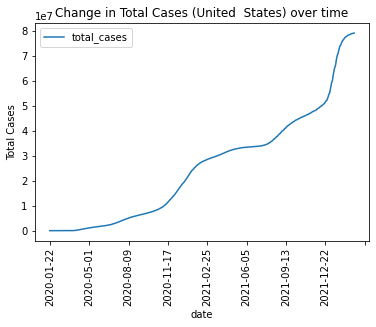

In [78]:
United_States = country_dataframes['United States']
United_States.plot.line(y = 'total_cases', ylabel = "Total Cases", x = 'date', title = "Change in Total Cases (United  States) over time")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=500)

In [47]:
# Create DataFrames for 5 other countries (just as an example)
Kyrgyzstan = country_dataframes['Kyrgyzstan']
Cameroon = country_dataframes['Cameroon']
Brazil = country_dataframes['Brazil']
Ireland = country_dataframes['Ireland']
Costa_Rica = country_dataframes['Costa Rica']

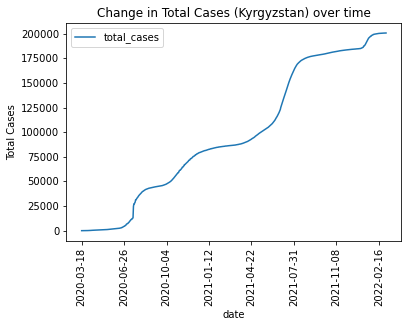

In [79]:
Kyrgyzstan.plot.line(y = 'total_cases', ylabel = "Total Cases", x = 'date', title = "Change in Total Cases (Kyrgyzstan) over time")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=500)

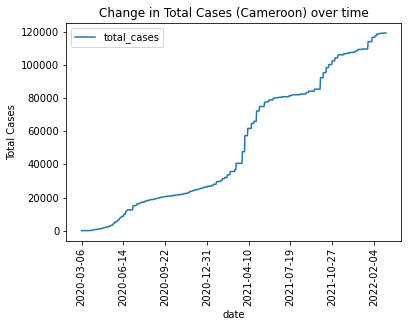

In [80]:
Cameroon.plot.line(y = 'total_cases', ylabel = "Total Cases", x = 'date', title = "Change in Total Cases (Cameroon) over time")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=500)

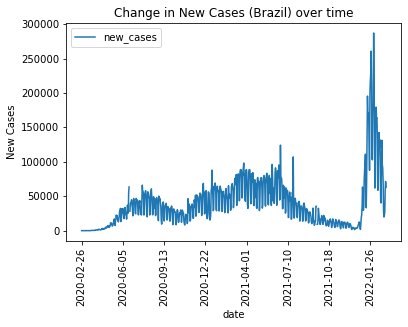

In [81]:
Brazil.plot.line(y = 'new_cases', ylabel = "New Cases", x = 'date', title = "Change in New Cases (Brazil) over time")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=500)

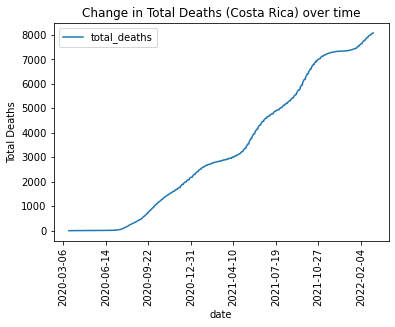

In [86]:
Costa_Rica.plot.line(y = 'total_deaths', ylabel = "Total Deaths", x = 'date', title = "Change in Total Deaths (Costa Rica) over time")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=500)

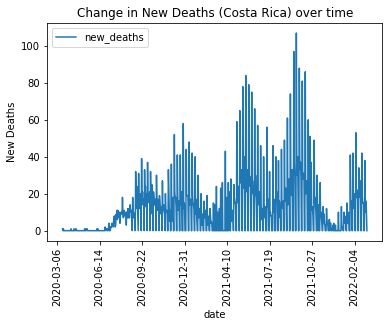

In [85]:
Costa_Rica.plot.line(y = 'new_deaths', ylabel = "New Deaths", x = 'date', title = "Change in New Deaths (Costa Rica) over time")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=500)